## Boston House Prices





https://www.kaggle.com/prasadperera/the-boston-housing-dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. There are 506 line items and 13 attributes (excluding price). The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [48]:
# import libraries that will be used in completing this assignment
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy.stats as stats
import pandas as pd
import seaborn as sns #plotting#
%matplotlib inline

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

The Boston House prices dataset is imported directly from sklearn library; referenced in multiple locations as a source, and converted to a pandas dataframe for ease of analysis.
 
 https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef (repeated) 
 
 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
 

In [50]:
from sklearn.datasets import load_boston
boston_dataset = load_boston() #storing Boston House prices as a variable boston_dataset (a dictionary)

In [51]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155



In [52]:
df.shape

(506, 13)

In [53]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The dataset shows 506 line items, 13 columns. The prices column does not appear as this is in the "target" column, needs to be added to the dataset as this is obviously the most important data element! https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 is heavily referenced to get this inital dataset into the dataframe required.

In [54]:
df['MEDV'] = boston_dataset.target

In [55]:
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


MEDV - (Median value of owner-occupied homes in $1000's) is the key value in the dataset; against which other variablesa re to be measured against for "best fit". The aim here is to explore the dataset for close alignment of varaibles which can demonstrate a relationship to the House price.

In [56]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
df.MEDV.describe() # summary of house prices

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [58]:
df['MEDV'].groupby([df['CHAS']]).describe() #summary of house prices by Charles v Non Charles 

,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0.0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1.0,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


From a cursory view of the data, the house prices along the Charles river are generally higher.

In [59]:
df['MEDV'].hist(bins=30)
%matplotlib inline

In [60]:
scatter_matrix(df, alpha=0.2)

NameError: name 'scatter_matrix' is not defined

In [61]:
 df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E1A8AD400>,
      dtype=object)

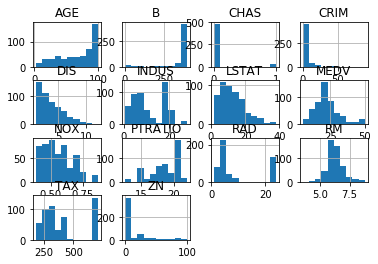

In [62]:
df.hist()

https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

df.corr() provides data on the above table with the correlation between each set of values. Large positive scores indicate a strong positive correlation

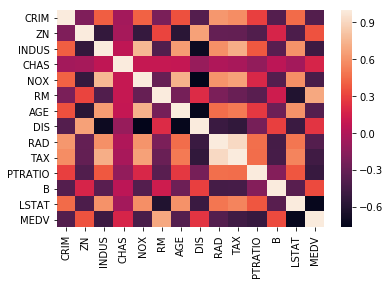

In [63]:
     import matplotlib.pyplot as plt
     import seaborn as sns
     %matplotlib inline 

     ax = sns.heatmap(df.corr())

In [64]:
# TODO: Minimum price of the data
minimum_price = np.min('MEDV')

# TODO: Maximum price of the data
maximum_price = np.max('MEDV')
    
# TODO: Mean price of the data
mean_price = np.mean('MEDV')

# TODO: Median price of the data
median_price = np.median('MEDV')

# TODO: Standard deviation of prices of the data
std_price = np.std('MEDV')
# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price: ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

TypeError: cannot perform reduce with flexible type

In [ ]:
sns.pairplot(df,vars = ['MEDV'],hue = 'CHAS')

In [ ]:
sns.pairplot(df, hue = "CHAS")

https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

## What to do with all this Data?

Linear regression is one of the fundamental statistical and machine learning techniques. Whether you want to do statistics, machine learning, or scientific computing, there are good chances that you’ll need it. It’s advisable to learn it first and then proceed towards more complex methods.
https://realpython.com/linear-regression-in-python/


Through the use of Regression analysis the aim is to determine the relation

https://realpython.com/linear-regression-in-python/#what-is-regression
"Regression searches for relationships among variables.
For example, you can observe several employees of some company and try to understand how their salaries depend on the features, such as experience, level of education, role, city they work in, and so on.
This is a regression problem where data related to each employee represent one observation. The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them.
Similarly, you can try to establish a mathematical dependence of the prices of houses on their areas, numbers of bedrooms, distances to the city center, and so on.
Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them."
In other words, you need to find a function that maps some features or variables to others sufficiently well.
The dependent features are called the dependent variables, outputs, or responses.
The independent features are called the independent variables, inputs, or predictors.
Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.
It is a common practice to denote the outputs with 𝑦 and inputs with 𝑥. If there are two or more independent variables, they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs."

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f ... refer to this

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

Linear Regression Theory
The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.
Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

This same concept can be extended to cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable(target variable) is dependent upon several independent variables. A regression model involving multiple variables can be represented as:
y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn
This is the equation of a hyperplane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

### Using Sklearn Functionality for Multi Linear Regression

Earlier I have eliminated some of the variables arr there does not appear to be a relationship between the House Prices and thaose variables. Now introducing the Multi Linera option....

In [ ]:
import sklearn.linear_model as lm

In [ ]:
m= lm.LinearRegression()

In [ ]:
X = df[["CHAS"]]
y = df[["CRIM"]]

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)

In [ ]:
m.fit(X,y)

In [ ]:
m.intercept_

In [ ]:
plt.HIST(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('CHAS vs CRIM')
plt.xlabel('CRIM')
plt.ylabel('CHAS')
plt.show()

***

## Appendix 1.
#### A view of Each VAriable against the Price to aid in eliminating variables not relevant to determining relationships or collerations

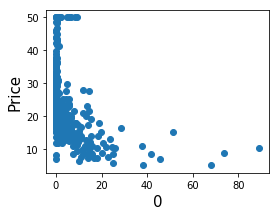

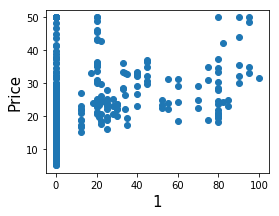

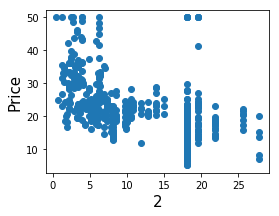

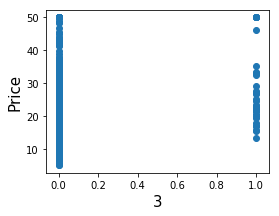

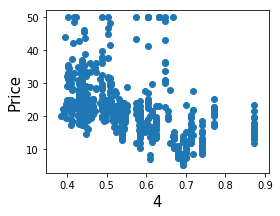

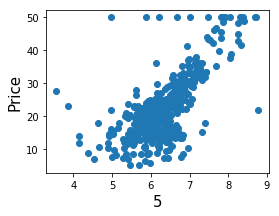

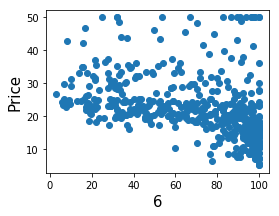

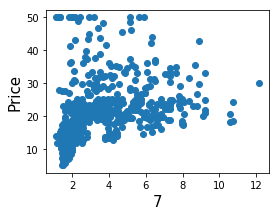

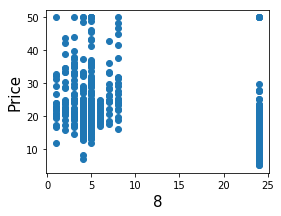

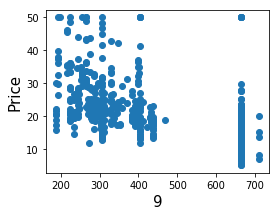

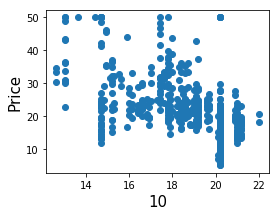

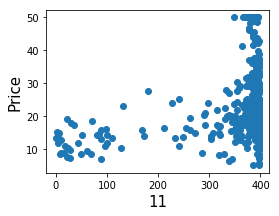

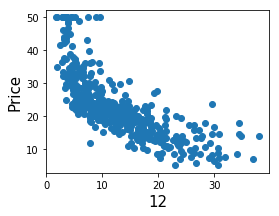

In [65]:
for index, feature_name in enumerate(boston_dataset.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_dataset.data[:, index], boston_dataset.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(index, size=15)
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E1A063780>,
      dtype=object)

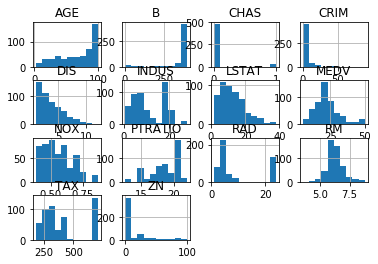

In [66]:
df.hist()

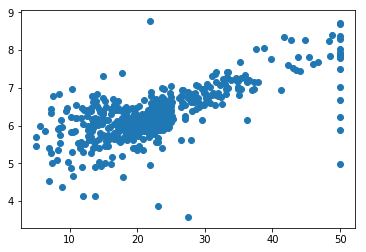

In [67]:
plt.scatter(df["MEDV"], df["RM"])

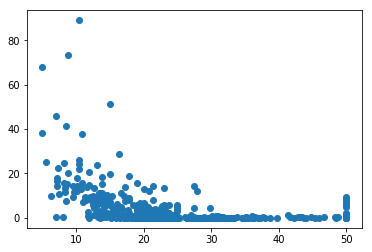

In [68]:
plt.scatter(df["MEDV"], df["CRIM"])

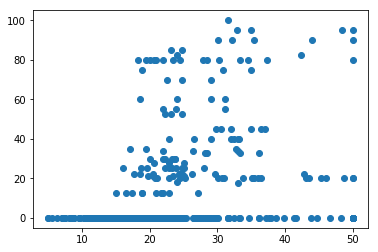

In [69]:
plt.scatter(df["MEDV"], df["ZN"])

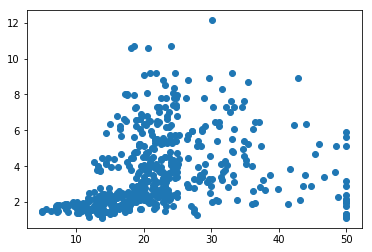

In [70]:
plt.scatter(df["MEDV"], df["DIS"])

In [71]:
df[df["CHAS"]=="1"]["MEDV"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

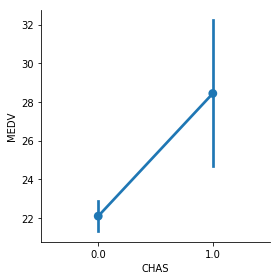

In [76]:
sns.factorplot(x="CHAS",y="MEDV",data=df)